# Wilde's Coursera Capstone
### Alexander Wilde

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem<a name="introduction"></a>

Car accidents occurs everywhere worldwide and is one of the leading causes for people. According to World Health Organization (WHO), roughly 1.35 million people die from traffic collisons. More than half of road traffic deaths involve users such as pedestrians, cyclists, and motorcyclists. Road traffic accidents also attribute to 3% of the domestic product. The goal is to identity relevant factors and derive insight on what events lead to these car accident and what severity is depended on.
<br><br>The main audience of this project is road services, rescue services and city administration.

#### Questions:

<ul>
    <li>What is the most common cause?</li>
    <li>Are there relationships between causes?</li>
    <li>What are the first things to look for to prevent car accidents?</li>
</ul>

## Data <a name="data"></a>

The dataset, containing roughly ~250,000 records as of Oct 2020, was used for analysis. It contains data collected from 2004 to 2020 and is based on accidents taken place in the state of Washington, Seattle. For each car accident, a severity (1 = prop damage and 2 = injury) code is assigned as well as other relevant information such as:

<ul>
    <li>location</li>
    <li>speeding involved</li>
    <li>road condition</li>
    <li>collision type</li>
    <li>weather condition</li>
    <li>lighting condition</li>
    <li>driver inattention</li>
    <li>number of people involved</li>
</ul>

These data points will be analyzed to what the major influences in car collisions.

Source Dataset: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv <br>
Metadata: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

### Data Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(path)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df[['SEVERITYCODE', 'SEVERITYCODE.1']].corr()

,SEVERITYCODE,SEVERITYCODE.1
SEVERITYCODE,1.0,1.0
SEVERITYCODE.1,1.0,1.0


In [4]:
df[['SEVERITYCODE', 'SEVERITYDESC']].corr()

,SEVERITYCODE
SEVERITYCODE,1.0


Both columns are equal. So we should drop one of them.

Lets drop unusefull columns:

In [5]:
df.drop(['OBJECTID', 'INCKEY', 'INTKEY', 'COLDETKEY', 'LOCATION', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'ADDRTYPE', 'SEVERITYCODE.1', 'PEDCYLCOUNT', 'VEHCOUNT', 'COLLISIONTYPE', 'SEVERITYDESC', 'PEDCOUNT', 'PEDROWNOTGRNT', 'HITPARKEDCAR', 'ST_COLCODE'], axis=1, inplace=True)

In [6]:
df.head()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Matched,2,2013/03/27 00:00:00+00,NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Matched,2,2006/12/20 00:00:00+00,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Matched,4,2004/11/18 00:00:00+00,NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Matched,3,2013/03/29 00:00:00+00,NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Matched,2,2004/01/28 00:00:00+00,NaN,0,Raining,Wet,Daylight,NaN


We interesting only in "Mathced" data. So we should drop "NaN" and "Unmatched" rows in "STATUS" column.

In [7]:
df["STATUS"].replace("Unmatched", np.nan, inplace=True)

In [8]:
df.dropna(subset=["STATUS"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.drop(["STATUS"], axis=1, inplace=True)

Check "INATTENTIONIND" column:

In [10]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

As we can see, we haven't "NO" variants at all. So we can replace "NaN" to "0" (which means "NO"), and "Y" replace to "1":

In [11]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace("Y", 1, inplace = True)

The next target is 'UNDERINFL' column.

In [12]:
df['UNDERINFL'].value_counts()

N    100274
0     80391
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [13]:
df['UNDERINFL'].replace("N", 0, inplace = True)
df['UNDERINFL'].replace("Y", 1, inplace = True)
df['UNDERINFL'] = df['UNDERINFL'].astype(int)

And last one - 'SPEEDING' column:

In [14]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [15]:
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace("Y", 1, inplace = True)

Next step - replace "Unknown" to NaN:

In [16]:
df.replace("Unknown", np.nan, inplace = True)

Answer is - what data types we have?

In [17]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
PERSONCOUNT         int64
INCDATE            object
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING            int64
dtype: object

Lets check how much missing values we have:

In [18]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,PERSONCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    189786
Name: SEVERITYCODE, dtype: int64

X
False    184601
True       5185
Name: X, dtype: int64

Y
False    184601
True       5185
Name: Y, dtype: int64

PERSONCOUNT
False    189786
Name: PERSONCOUNT, dtype: int64

INCDATE
False    189786
Name: INCDATE, dtype: int64

INATTENTIONIND
False    189786
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189786
Name: UNDERINFL, dtype: int64

WEATHER
False    174498
True      15288
Name: WEATHER, dtype: int64

ROADCOND
False    174580
True      15206
Name: ROADCOND, dtype: int64

LIGHTCOND
False    176027
True      13759
Name: LIGHTCOND, dtype: int64

SPEEDING
False    189786
Name: SPEEDING, dtype: int64



As we can see, we have 5185 rows without coordinates (now we can just ignore it, because we will need this data later for map wisualization), and 13k-15k other data (weather, roadcond, lightcond). <br><br>
We need this data and cant predict it, so we should just drop this raws.

In [20]:
df.dropna(subset=["WEATHER", "ROADCOND", "LIGHTCOND"], axis=0, inplace=True)

Now lets choose only years. We dont need whole dates:

In [21]:
df['INCDATE'] = pd.DatetimeIndex(df['INCDATE']).year

And then we should normalize 'ROADCOND' and 'LIGHTCOND':

In [22]:
df['ROADCOND'].value_counts()

Dry               121752
Wet                46468
Ice                 1096
Snow/Slush           845
Other                111
Standing Water       108
Sand/Mud/Dirt         66
Oil                   61
Name: ROADCOND, dtype: int64

We can rank conditions according to their danger from 0 to 1. So 0 will be "dry", and all other cases will be 1:

In [23]:
df['ROADCOND'].replace('Dry', 0, inplace = True)
df['ROADCOND'].replace("Wet", 1, inplace = True)
df['ROADCOND'].replace("Ice", 1, inplace = True)
df['ROADCOND'].replace("Snow/Slush", 1, inplace = True)
df['ROADCOND'].replace("Standing Water", 1, inplace = True)
df['ROADCOND'].replace("Sand/Mud/Dirt", 1, inplace = True)
df['ROADCOND'].replace("Oil", 1, inplace = True)
df['ROADCOND'].replace("Other", 1, inplace = True)

In [24]:
df['LIGHTCOND'].value_counts()

Daylight                    112834
Dark - Street Lights On      46844
Dusk                          5662
Dawn                          2424
Dark - No Street Lights       1415
Dark - Street Lights Off      1118
Other                          201
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

Same idea:

In [25]:
df['LIGHTCOND'].replace('Daylight', 0, inplace = True)
df['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace = True)
df['LIGHTCOND'].replace('Dusk', 1, inplace = True)
df['LIGHTCOND'].replace('Dawn', 1, inplace = True)
df['LIGHTCOND'].replace('Dark - No Street Lights', 1, inplace = True)
df['LIGHTCOND'].replace('Other', 1, inplace = True)
df['LIGHTCOND'].replace('Dark - Unknown Lighting', 1, inplace = True)
df['LIGHTCOND'].replace('Dark - Street Lights Off', 1, inplace = True)

And with weather too. Clear and Overcast will be 0:

In [26]:
df['WEATHER'].value_counts()

Clear                       108959
Raining                      32734
Overcast                     26976
Snowing                        831
Fog/Smog/Smoke                 555
Other                          264
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               47
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [27]:
df['WEATHER'].replace('Clear', 0, inplace = True)
df['WEATHER'].replace('Overcast', 0, inplace = True)
df['WEATHER'].replace('Partly Cloudy', 0, inplace = True)
df['WEATHER'].replace('Raining', 1, inplace = True)
df['WEATHER'].replace('Snowing', 1, inplace = True)
df['WEATHER'].replace('Other', 1, inplace = True)
df['WEATHER'].replace('Sleet/Hail/Freezing Rain', 1, inplace = True)
df['WEATHER'].replace('Blowing Sand/Dirt', 1, inplace = True)
df['WEATHER'].replace('Severe Crosswind', 1, inplace = True)
df['WEATHER'].replace('Fog/Smog/Smoke', 1, inplace = True)

Data cleared and ready to go.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required **data: location and type (category) of every restaurant within 6km from Berlin center** (Alexanderplatz). We have also **identified Italian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Berlin - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Italian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data.

In [28]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2013,0,0,0,1,0,0
1,1,-122.347294,47.647172,2,2006,0,0,1,1,1,0
2,1,-122.334540,47.607871,4,2004,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,2013,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,2004,0,0,1,1,0,0


First at all, lets look how the picture of accidents has changed over time in general:

In [30]:
df_dates = df['INCDATE'].value_counts()
df_dates = pd.DataFrame(df_dates)
df_dates.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_dates

,INCDATE
2004,11004
2005,13809
2006,13888
2007,13094
2008,11945
2009,9920
2010,9413
2011,9296
2012,9463
2013,9082


<AxesSubplot:>

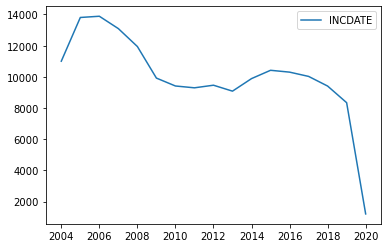

In [31]:
df_dates.plot()

As we can see, peak of accidents was in 2005-2006, and after 2016 amount of accident increasly falls.

Now lets look correlations:

In [32]:
df[['INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']].corr()

,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
INATTENTIONIND,1.000000,-0.036292,-0.031633,-0.035152,-0.063941,-0.059372
UNDERINFL,-0.036292,1.000000,0.004086,0.008116,0.225326,0.088081
WEATHER,-0.031633,0.004086,1.000000,0.757512,0.161445,0.108626
ROADCOND,-0.035152,0.008116,0.757512,1.000000,0.178592,0.134975
LIGHTCOND,-0.063941,0.225326,0.161445,0.178592,1.000000,0.087299
SPEEDING,-0.059372,0.088081,0.108626,0.134975,0.087299,1.000000


Nice! <br><br>

Bad Weather + Bad road have 75% correlation! <br>
Dark + drugs = 22% <br>
Bad weather + dark = 16% corr <br>
Bad weather + speeding = 10% <br>
Bad road + dark = 17% <br>
Bad road + speeding = 13% corr.



Now lets look how much "Conditions" we will have:

In [33]:
total_df = [['INATTENTIONIND', df['INATTENTIONIND'].sum()], ['UNDERINFL', df['UNDERINFL'].sum()], ['WEATHER', df['WEATHER'].sum()], ['ROADCOND', df['ROADCOND'].sum()], ['LIGHTCOND', df['LIGHTCOND'].sum()], ['SPEEDING', df['SPEEDING'].sum()]]

In [34]:
total_df = pd.DataFrame(total_df)
total_df.rename(columns={0:'Condition', 1:'Amount'}, inplace=True)
total_df.set_index('Condition', inplace=True)
total_df

,Amount
Condition,
INATTENTIONIND,28611
UNDERINFL,8999
UNDERINFL,8999
WEATHER,34567
ROADCOND,48755
LIGHTCOND,57673
SPEEDING,9143


Text(0.5, 1.0, 'The total number of recorded interference.')

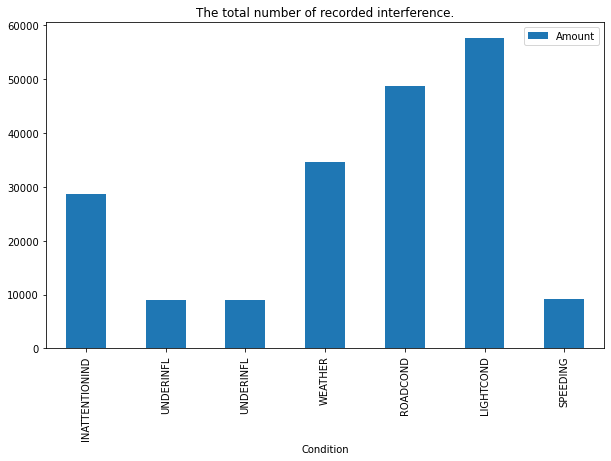

In [35]:
total_df.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.title('The total number of recorded interference.')

## Results and Discussion <a name="results"></a>

A bad road is the main aggravating factor. As we can see, Bad Weather + Bad road have 75% correlation, Bad road + dark = 17% and Bad road + speeding = 13% corr. <br>
Poor lighting is also a big problem - the number one factor. <br>
The driver's inattention, on the contrary, does not correlate with anything, which suggests that this is an independent factor that cannot be controlled.<br>
Drugs and alcohol go very badly with poor lighting.<br>
Speeding does not go well with bad weather and bad roads.<br>

## Conclusion <a name="conclusion"></a>

We cant control weather, but can control the condition of the roadway and artificial lighting.<br>
But at the same time, the total number of accidents has been steadily decreasing since 2016, which indicates the correct trend.<br><br>
**As a recommendation, I recommend that you especially carefully monitor areas with poor road surfaces and poor lighting in bad weather.**